In [58]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
print("success")

success


In [60]:
# reading in the csv file
batting_data = pd.read_csv('batting_data.csv')
batting_data.head(5)

,"last_name, first_name",player_id,year,ab,pa,hit,single,double,triple,home_run,...,on_base_plus_slg,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"Hunter, Torii",116338,2015,521,567,125,81,22,0,22,...,0.702,0.304,0.290,28.5,5.0,34.9,98.563404,93.393480,23.1,53.4
1,"Ortiz, David",120074,2015,528,614,144,70,37,0,37,...,0.913,0.379,0.420,34.8,13.1,49.1,102.851133,96.053058,23.2,44.7
2,"Rodriguez, Alex",121347,2015,523,620,131,75,22,1,33,...,0.842,0.361,0.368,31.4,10.9,43.9,101.381141,95.014380,32.0,43.9
3,"Ramirez, Aramis",133380,2015,475,516,117,68,31,1,17,...,0.720,0.309,0.304,33.5,5.6,34.5,97.851256,92.944763,17.9,52.9
4,"Beltré, Adrian",134181,2015,567,619,163,109,32,4,18,...,0.787,0.337,0.360,35.7,5.5,40.4,99.252697,93.842412,16.8,48.1


In [62]:
# Data Cleaning
# Check for missing values
missing_summary = batting_data.isnull().sum()
print(missing_summary)
# Check for duplicate rows
duplicate_rows = batting_data.duplicated().sum()
print(duplicate_rows)

# Identify columns with potential issues
numeric_columns = batting_data.select_dtypes(include=['float64', 'int64'])
negative_values = (numeric_columns < 0).sum()
print(numeric_columns)
print(negative_values)

last_name, first_name    0
player_id                0
year                     0
ab                       0
pa                       0
hit                      0
single                   0
double                   0
triple                   0
home_run                 0
strikeout                0
walk                     0
k_percent                0
bb_percent               0
batting_avg              0
slg_percent              0
on_base_percent          0
on_base_plus_slg         0
woba                     0
xwoba                    0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
avg_best_speed           0
avg_hyper_speed          0
whiff_percent            0
swing_percent            0
dtype: int64
0
      player_id  year   ab   pa  hit  single  double  triple  home_run  \
0        116338  2015  521  567  125      81      22       0        22   
1        120074  2015  528  614  144      70      37       0        37   
2        121347  2015  523  620  1

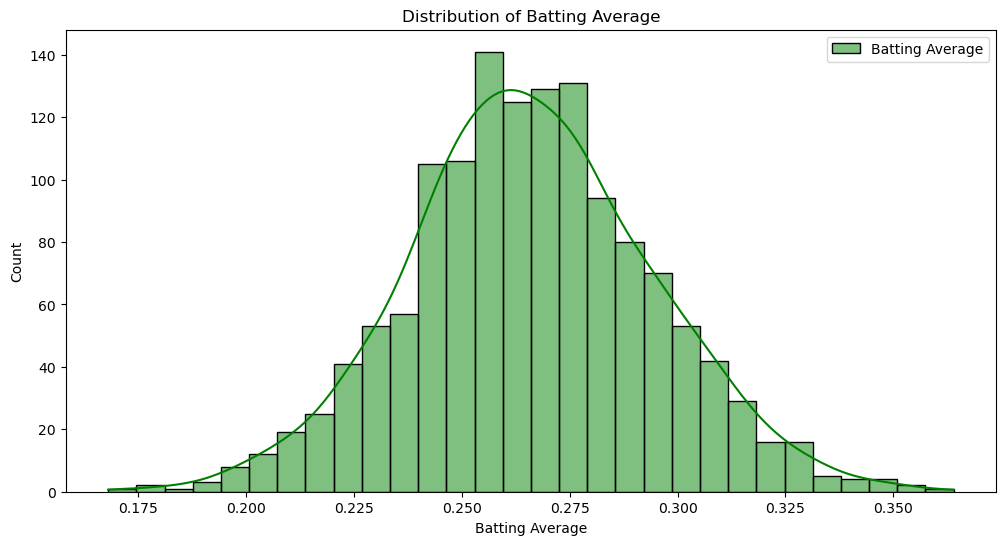

In [64]:
# Exploratory Data Analysis
# Distribution of Batting Average
plt.figure(figsize=(12, 6))
sns.histplot(batting_data['batting_avg'], kde=True, bins=30, color='green', label='Batting Average')
plt.title('Distribution of Batting Average')
plt.xlabel('Batting Average')
plt.legend()
plt.show()

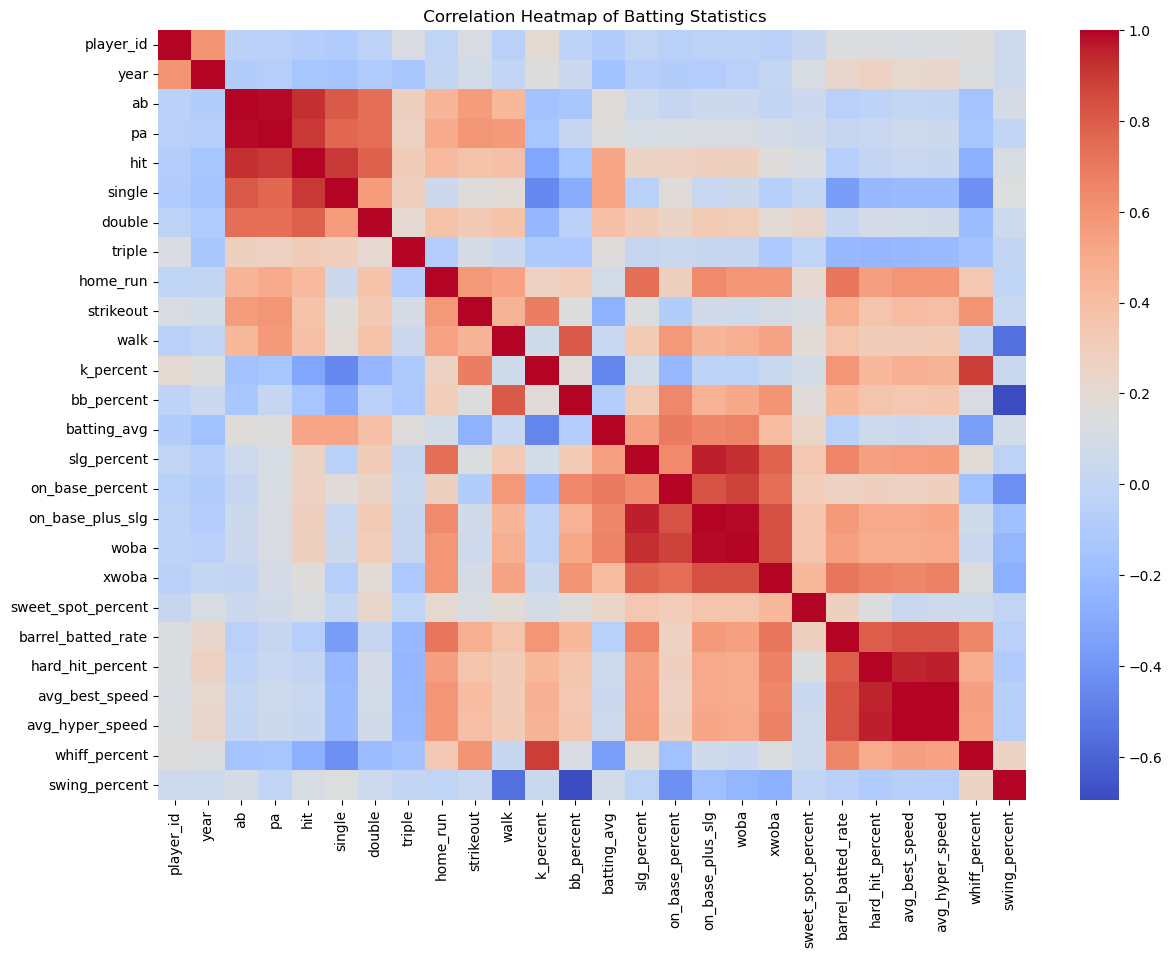

In [20]:
# Exploratory Data Analysis Continnued
# Correlation Matrix using only numeric columns
numeric_columns_only = batting_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns_only.corr()

# Visualize the corrected correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title(' Correlation Heatmap of Batting Statistics')
plt.show()

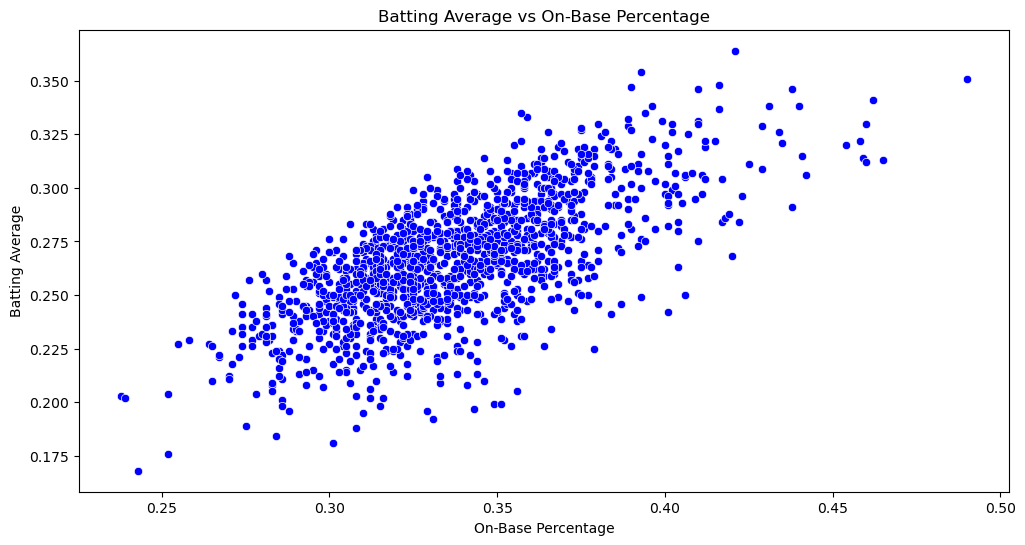

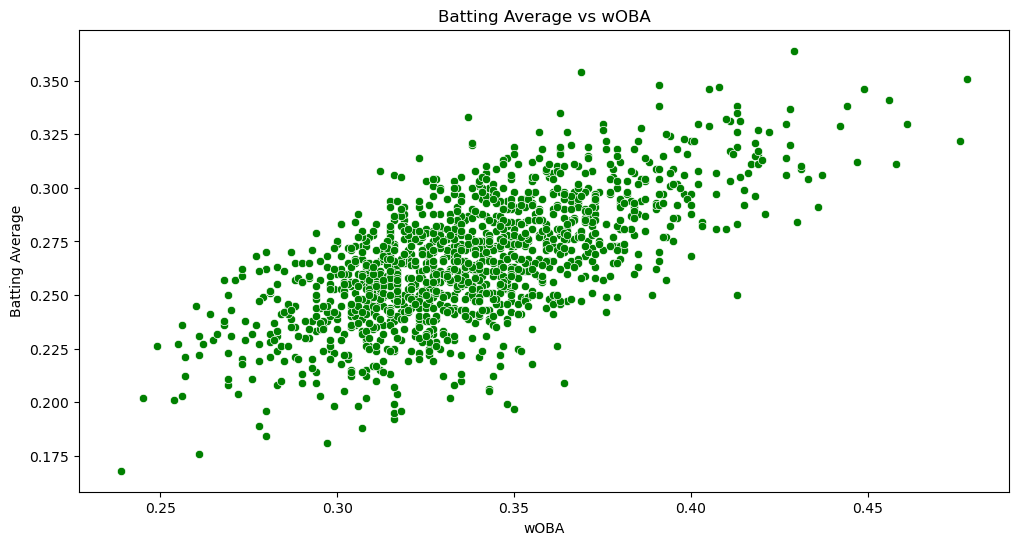

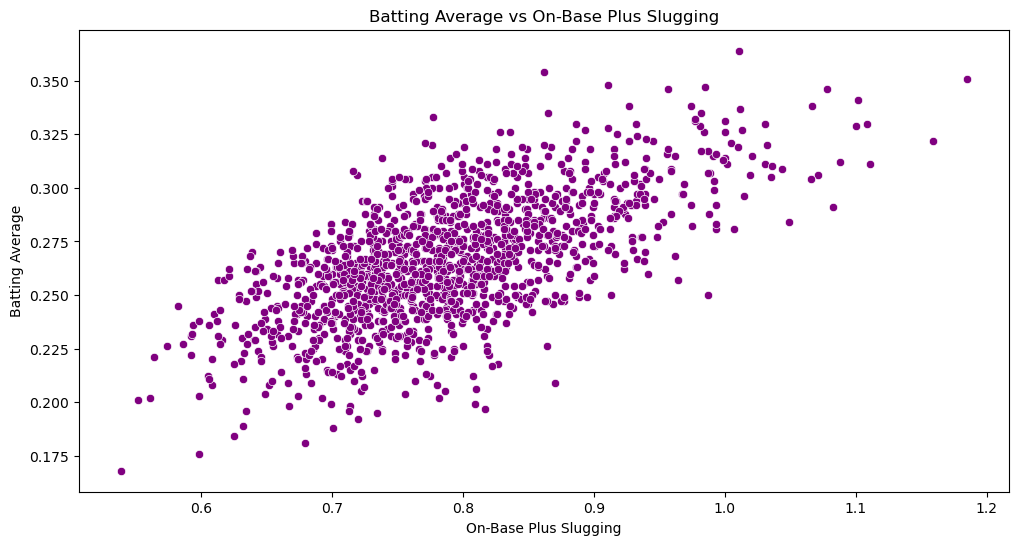

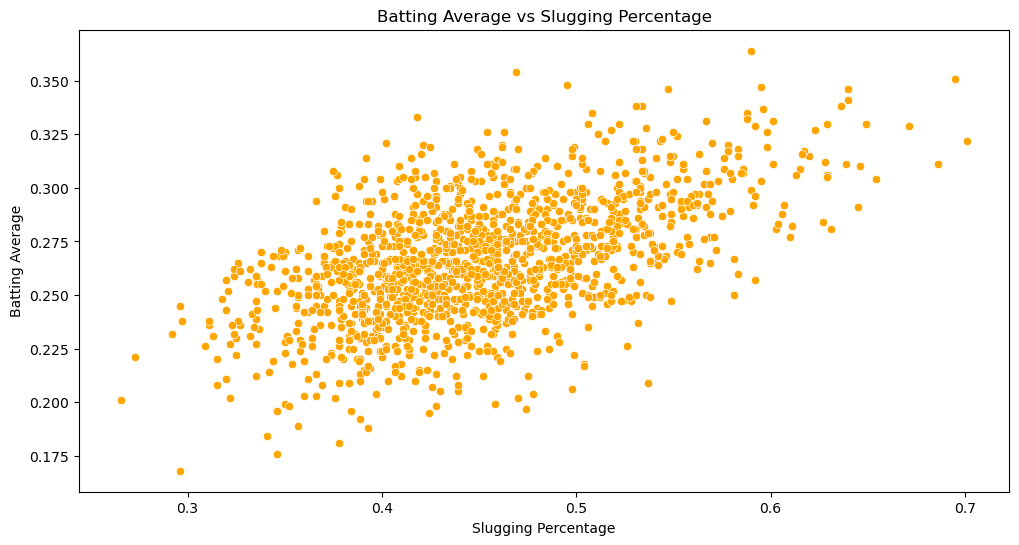

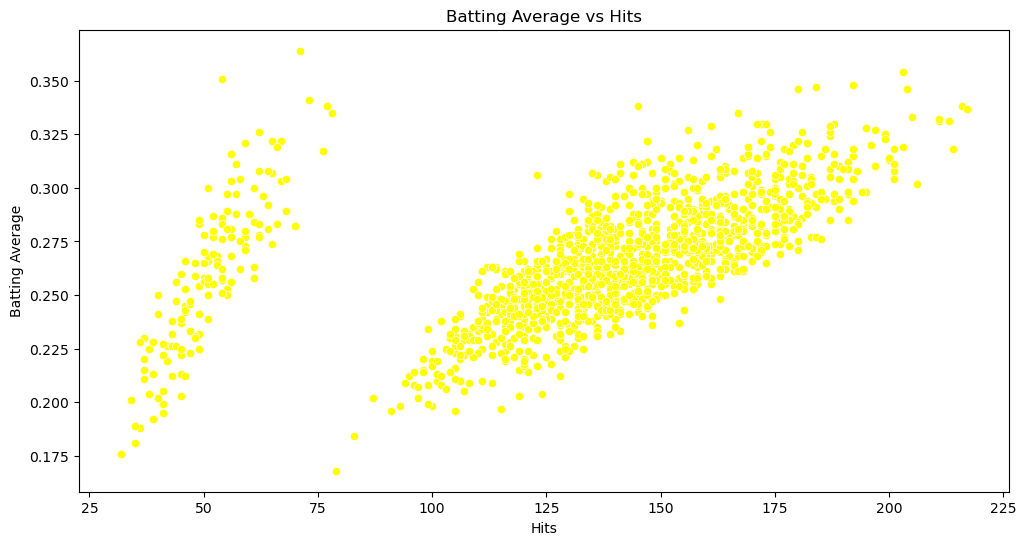

In [66]:
# Exploratory Data Analysis Continued
# Visualize relationships between key features and batting average
plt.figure(figsize=(12, 6))
sns.scatterplot(x=batting_data['on_base_percent'], y=batting_data['batting_avg'], color='blue')
plt.title('Batting Average vs On-Base Percentage')
plt.xlabel('On-Base Percentage')
plt.ylabel('Batting Average')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=batting_data['woba'], y=batting_data['batting_avg'], color='green')
plt.title('Batting Average vs wOBA')
plt.xlabel('wOBA')
plt.ylabel('Batting Average')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=batting_data['on_base_plus_slg'], y=batting_data['batting_avg'], color='purple')
plt.title('Batting Average vs On-Base Plus Slugging')
plt.xlabel('On-Base Plus Slugging')
plt.ylabel('Batting Average')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=batting_data['slg_percent'], y=batting_data['batting_avg'], color='orange')
plt.title('Batting Average vs Slugging Percentage')
plt.xlabel('Slugging Percentage')
plt.ylabel('Batting Average')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=batting_data['hit'], y=batting_data['batting_avg'], color='yellow')
plt.title('Batting Average vs Hits')
plt.xlabel('Hits')
plt.ylabel('Batting Average')
plt.show()


In [82]:
# Analysis
# Regressions
# Selecting top features for prediction
features = ['on_base_percent', 'woba', 'on_base_plus_slg', 'slg_percent', 'hit']
target = 'batting_avg'

# Prepare the data for modeling
X = batting_data[features]
y = batting_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom scoring function for RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Perform 5-fold cross-validation using RMSE as the metric
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = np.mean(cv_rmse)
std_rmse = np.std(cv_rmse)

# Display cross-validation results
print("Cross-Validation Results with Linear Regression:")
print(f"RMSE Scores for Each Fold: {cv_rmse}")
print(f"Mean RMSE: {mean_rmse:.3f}")
print(f"Standard Deviation of RMSE: {std_rmse:.3f}")

# Scale data and prepare logistic regression pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

# Perform cross-validation with logistic regression
cross_val_scores = cross_val_score(pipeline, X, y > y.mean(), cv=5, scoring='accuracy')  # Binary target: above/below mean batting average

# Average cross-validation score
avg_cv_score = cross_val_scores.mean()

# Display cross-validation results
cv_results = pd.DataFrame({
    "Fold": range(1, 6),
    "Accuracy": cross_val_scores
})
cv_results.loc['Average'] = ['-', avg_cv_score]
print("Cross-Validation with Logistic Regression")
print(cv_results)

# LINEAR REGRESSION
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
model_performance = {
    "Mean Squared Error": mse,
    "R-squared": r2
}
print("Linear Regression Results:")
print(model_performance)

Cross-Validation Results with Linear Regression:
RMSE Scores for Each Fold: [0.01631208 0.01655877 0.03290233 0.01742584 0.01531973]
Mean RMSE: 0.020
Standard Deviation of RMSE: 0.007
Cross-Validation with Logistic Regression
        Fold  Accuracy
0          1  0.829091
1          2  0.770909
2          3  0.832727
3          4  0.701818
4          5  0.778182
Average    -  0.782545
Linear Regression Results:
{'Mean Squared Error': 0.0002919609435787371, 'R-squared': 0.630399577097755}


In [78]:
# Prediction
# Train the linear regression model with the current features and entire dataset
final_model = LinearRegression()
final_model.fit(X, y)

# Generate predictions for 2025
future_data = X.mean().to_frame().T  # Create a single row with the mean of each feature
future_predictions = final_model.predict(future_data)

# Display the prediction for the 2025 season
future_prediction_result = pd.DataFrame({
    "Feature": features,
    "Mean Value (2024)": X.mean(),
    "2025 Prediction (Batting Average MLB League Avg)": future_predictions[0]
})

future_prediction_result.round(3)

,Feature,Mean Value (2024),2025 Prediction (Batting Average MLB League Avg)
on_base_percent,on_base_percent,0.337,0.266
woba,woba,0.338,0.266
on_base_plus_slg,on_base_plus_slg,0.789,0.266
slg_percent,slg_percent,0.451,0.266
hit,hit,134.780,0.266


In [74]:
# Individual Player Predictions
# Add predictions for 2025 to the dataset
batting_data['predicted_batting_avg_2025'] = model.predict(X)

# Filter for players who played in 2024 and include the predictions
players_2024 = batting_data[batting_data['year'] == 2024]
players_2024= players_2024_predictions[['last_name, first_name', 'player_id','batting_avg', 'predicted_batting_avg_2025']].copy()

# Round the predictions to 3 decimal places
players_2024_predictions['predicted_batting_avg_2025'] = players_2024_predictions['predicted_batting_avg_2025'].round(3)

# Display the final predictions for 2024 players
print("2025 Batting Average Predictions for Players Who Played in the 2024 Season:")
print(players_2024_predictions)

2025 Batting Average Predictions for Players Who Played in the 2024 Season:
     last_name, first_name  player_id  batting_avg  predicted_batting_avg_2025
1246     McCutchen, Andrew     457705        0.232                       0.249
1247        Turner, Justin     457759        0.259                       0.263
1248       Santana, Carlos     467793        0.238                       0.256
1249     Goldschmidt, Paul     502671        0.245                       0.251
1250          Altuve, Jose     514888        0.295                       0.283
...                    ...        ...          ...                         ...
1370      Chourio, Jackson     694192        0.275                       0.264
1371       Schanuel, Nolan     694384        0.250                       0.260
1372       Langford, Wyatt     694671        0.253                       0.255
1373          Young, Jacob     696285        0.256                       0.244
1374      Merrill, Jackson     701538        0.292     

In [76]:
# Filter data for 2023 and 2024 seasons
data_2023 = batting_data[batting_data['year'] == 2023]
data_2024 = batting_data[batting_data['year'] == 2024]

# Merge datasets to compare 2023 and 2024 batting averages for the same players
comparison_data = pd.merge(
    data_2023[['last_name, first_name', 'player_id', 'batting_avg']].rename(columns={'batting_avg': 'batting_avg_2023'}),
    data_2024[['last_name, first_name', 'player_id', 'batting_avg']].rename(columns={'batting_avg': 'batting_avg_2024'}),
    on='player_id'
)

# Calculate the difference in batting averages
comparison_data['avg_difference'] = comparison_data['batting_avg_2024'] - comparison_data['batting_avg_2023']
print(comparison_data)

   last_name, first_name_x  player_id  batting_avg_2023  \
0           Turner, Justin     457759             0.276   
1          Santana, Carlos     467793             0.240   
2        Goldschmidt, Paul     502671             0.268   
3         Freeman, Freddie     518692             0.331   
4          Perez, Salvador     521692             0.255   
..                     ...        ...               ...   
79              Abrams, CJ     682928             0.245   
80         Carroll, Corbin     682998             0.285   
81       Henderson, Gunnar     683002             0.255   
82          Volpe, Anthony     683011             0.209   
83          Vaughn, Andrew     683734             0.258   

   last_name, first_name_y  batting_avg_2024  avg_difference  
0           Turner, Justin             0.259          -0.017  
1          Santana, Carlos             0.238          -0.002  
2        Goldschmidt, Paul             0.245          -0.023  
3         Freeman, Freddie             